In [63]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [64]:
Fake_data = pd.read_csv('fake_job_postings_5000.csv')
True_data = pd.read_csv('separated_true_job_postings.csv')

In [65]:
Fake_data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Remote Assistant,Worldwide,Customer Service,"$5,000-$15,000",Unparalleled chance to earn money online easily,Flexible part-time position with excellent ear...,Must have a computer and internet access. No e...,"Flexible hours, work from home, high earning p...",1,0,0,Part-time,1+ years,NaN,Online Jobs,Data Entry,1
1,2,Part-Time Job,Unknown,Administration,Unspecified,A rapidly growing online business looking for ...,Assist in scheduling and communication for a g...,Basic typing skills and ability to follow simp...,"Flexible hours, work from home, high earning p...",1,1,1,Freelance,NaN,Unspecified,Remote Work,Data Entry,1
2,3,Work From Home Opportunity,Online,NaN,"$5,000-$15,000",Be your own boss and earn from home with flexi...,Assist in scheduling and communication for a g...,Must be at least 18 years old and ready to sta...,"Earn weekly, no prior qualifications needed",1,0,1,Unspecified,1+ years,NaN,NaN,Miscellaneous,1


In [66]:
True_data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [67]:
combined_data = pd.concat([Fake_data, True_data], ignore_index=True)

In [68]:
combined_data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Remote Assistant,Worldwide,Customer Service,"$5,000-$15,000",Unparalleled chance to earn money online easily,Flexible part-time position with excellent ear...,Must have a computer and internet access. No e...,"Flexible hours, work from home, high earning p...",1,0,0,Part-time,1+ years,NaN,Online Jobs,Data Entry,1
1,2,Part-Time Job,Unknown,Administration,Unspecified,A rapidly growing online business looking for ...,Assist in scheduling and communication for a g...,Basic typing skills and ability to follow simp...,"Flexible hours, work from home, high earning p...",1,1,1,Freelance,NaN,Unspecified,Remote Work,Data Entry,1
2,3,Work From Home Opportunity,Online,NaN,"$5,000-$15,000",Be your own boss and earn from home with flexi...,Assist in scheduling and communication for a g...,Must be at least 18 years old and ready to sta...,"Earn weekly, no prior qualifications needed",1,0,1,Unspecified,1+ years,NaN,NaN,Miscellaneous,1
3,4,Work From Home Opportunity,Unknown,NaN,"$5,000-$15,000",Work for a global company without leaving your...,No prior experience required. Simply complete ...,Must be at least 18 years old and ready to sta...,"No commute, immediate start, paid per task",1,0,0,Part-time,Entry-level,High School Diploma,Freelancing,Administration,1
4,5,Earn Money Quickly,Online,Customer Service,Unspecified,A rapidly growing online business looking for ...,Flexible part-time position with excellent ear...,Ability to handle multiple tasks online effici...,"Unparalleled flexibility, easy tasks to complete",1,0,1,Commission-based,NaN,NaN,NaN,Miscellaneous,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
9284,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
9285,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
9286,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [69]:
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back to a single string
    return ' '.join(tokens)

In [70]:
# Apply preprocessing to relevant columns
for col in ['title', 'description']:
    if col in combined_data.columns:
        combined_data[col] = combined_data[col].fillna("").apply(preprocess_text)

In [71]:
preprocessed_path = "preprocessed_combined_job_postings.csv"
combined_data.to_csv(preprocessed_path, index=False)
print(f"Preprocessed dataset saved to {preprocessed_path}")

Preprocessed dataset saved to preprocessed_combined_job_postings.csv


In [72]:
preprocessed_path = "preprocessed_combined_job_postings.csv"
data = pd.read_csv(preprocessed_path)

In [73]:
data.isnull().sum()

job_id                    0
title                     0
location                 61
department             3856
salary_range           3611
company_profile         661
description               0
requirements            655
benefits               1698
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         864
required_experience    3401
required_education     3656
industry               2166
function               1646
fraudulent                0
dtype: int64

In [74]:
data = data.fillna("")

In [75]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [76]:
# Combine text columns into a single feature
if 'title' in data.columns and 'description' in data.columns:
    data['text'] = data['title'] + ' ' + data['description']
else:
    raise ValueError("Expected columns 'title' and 'description' are missing.")

In [77]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,1,remot assist,Worldwide,Customer Service,"$5,000-$15,000",Unparalleled chance to earn money online easily,flexibl parttim posit excel earn potenti,Must have a computer and internet access. No e...,"Flexible hours, work from home, high earning p...",1,0,0,Part-time,1+ years,,Online Jobs,Data Entry,1,remot assist flexibl parttim posit excel earn ...
1,2,parttim job,Unknown,Administration,Unspecified,A rapidly growing online business looking for ...,assist schedul commun grow busi,Basic typing skills and ability to follow simp...,"Flexible hours, work from home, high earning p...",1,1,1,Freelance,,Unspecified,Remote Work,Data Entry,1,parttim job assist schedul commun grow busi
2,3,work home opportun,Online,,"$5,000-$15,000",Be your own boss and earn from home with flexi...,assist schedul commun grow busi,Must be at least 18 years old and ready to sta...,"Earn weekly, no prior qualifications needed",1,0,1,Unspecified,1+ years,,,Miscellaneous,1,work home opportun assist schedul commun grow ...
3,4,work home opportun,Unknown,,"$5,000-$15,000",Work for a global company without leaving your...,prior experi requir simpli complet task home,Must be at least 18 years old and ready to sta...,"No commute, immediate start, paid per task",1,0,0,Part-time,Entry-level,High School Diploma,Freelancing,Administration,1,work home opportun prior experi requir simpli ...
4,5,earn money quickli,Online,Customer Service,Unspecified,A rapidly growing online business looking for ...,flexibl parttim posit excel earn potenti,Ability to handle multiple tasks online effici...,"Unparalleled flexibility, easy tasks to complete",1,0,1,Commission-based,,,,Miscellaneous,1,earn money quickli flexibl parttim posit excel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,17876,account director distribut,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,case first time youv visit websit vend award w...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,account director distribut case first time you...
9284,17877,payrol account,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,payrol account focu primarili payrol function ...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,payrol account payrol account focu primarili p...
9285,17878,project cost control staff engin cost control ...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,experienc project cost control staff engin req...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,,,,,0,project cost control staff engin cost control ...
9286,17879,graphic design,"NG, LA, Lagos",,,,nemsia studio look experienc visualgraph desig...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,graphic design nemsia studio look experienc vi...


In [78]:
# Define features and target
X = data['text']
y = data['fraudulent']

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10184\3386234041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


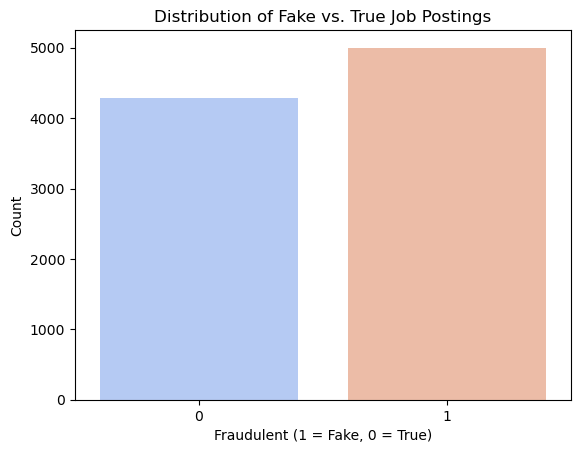

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y, palette="plasma")
plt.title("Distribution of Fake vs. True Job Postings")
plt.xlabel("Fraudulent (1 = Fake, 0 = True)")
plt.ylabel("Count")
plt.show()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [82]:
# Train a Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,    
    max_depth=16,           
    max_features='sqrt',   
    min_samples_split=10, 
    min_samples_leaf=9,      
    max_leaf_nodes=35,      
)

model.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=16, max_leaf_nodes=35, min_samples_leaf=9,
                       min_samples_split=10)

In [83]:
train_score = model.score(X_train_tfidf, y_train) * 100
test_score = model.score(X_test_tfidf, y_test) * 100

In [84]:
print("Accuracy of Training Data:", train_score)
print("Accuracy of Testing Data:", test_score)

Accuracy of Training Data: 98.89636608344549
Accuracy of Testing Data: 98.8697524219591


In [85]:
y_pred = model.predict(X_test_tfidf)

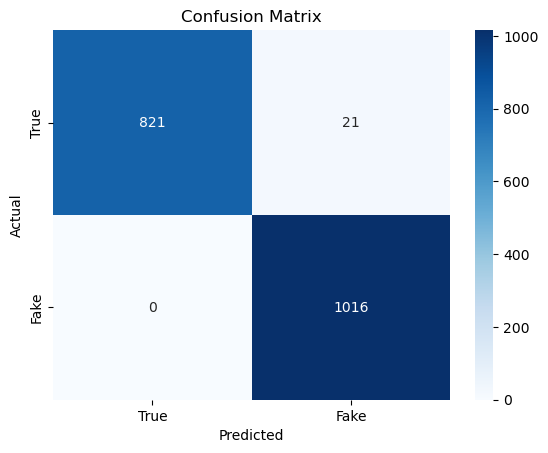

In [86]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [87]:
new_data = pd.DataFrame({
    "title": ["Data Entry Specialist"],
    "description": [
        "Earn $5000 per week working from home. No skills required!"
    ]
})

In [ ]:
new_data['text'] = new_data['title'] + " " + new_data['description']

In [ ]:
new_data['text'] = new_data['text'].apply(preprocess_text)

In [ ]:
new_data_tfidf = vectorizer.transform(new_data['text'])

In [ ]:
predictions = model.predict(new_data_tfidf)

In [ ]:
if prediction == 0:
  print("Posting Job is True")
else:
  print("Posting job is Fake")